In [39]:
import pandas as pd
import numpy as np

In [40]:
df = pd.read_excel('Tips.xlsx', sheets = 'tips')

In [41]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Overall Average  Tip

In [42]:
Overall_Avg_Tip = np.mean(df['tip'])

In [43]:
print('The Overall Avg Tip is $', round(Overall_Avg_Tip,2), sep = '')

The Overall Avg Tip is $3.0


### 2. Get a numerical summary for 'tip' - are the median and mean very different? What does this tell you about the field?

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64
The mena of tip is 2.9982786885245902and  median is 2.9
AS mean and Median are close enough so tip has symmetrical distribution


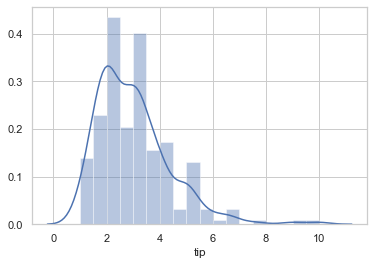

In [44]:
print(df['tip'].describe())
print('The mena of tip is ' + str(df['tip'].mean()) + 'and  median is '+str(df['tip'].median())  )
print('AS mean and Median are close enough so tip has symmetrical distribution')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style ='whitegrid')
sns.distplot(df['tip'])
plt.show()

### 3. Prepare a boxplot for 'tip', are there any outliers?

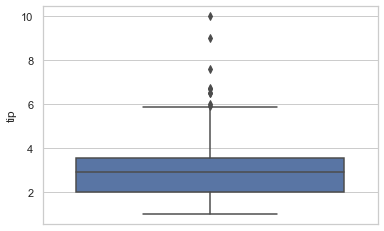

Tip contains Six outliers


In [45]:
sns.boxplot(df['tip'],orient = 'vertical')
plt.show()
print('Tip contains Six outliers')

### 4. Prepare a boxplot for 'total_bill', are there any outliers?

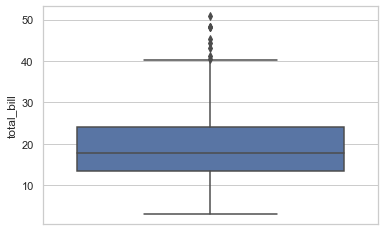

Total bill contains Seven outlier points


In [46]:
sns.boxplot(df['total_bill'],orient = 'vertical')
plt.show()
print('Total bill contains Seven outlier points')

### 5. Gender: what is the percent of females in the data? 

In [47]:
gender = pd.value_counts(df['sex'],normalize= True)
print(gender)
print('Female percentage =',gender[1]*100,"%")

Male      0.643443
Female    0.356557
Name: sex, dtype: float64
Female percentage = 35.65573770491803 %


### 6. Prepare a bar plot with the bars representing the percentage of records for each gender.

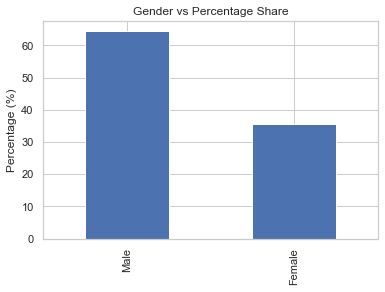

In [48]:
df['sex'].value_counts(normalize=True).mul(100).plot(kind='bar')
plt.ylabel('Percentage (%)')
plt.title('Gender vs Percentage Share')
plt.show()

### 7. Does the average tip differ by gender? Does one gender tip more than the other?

In [49]:
print(df.groupby('sex').tip.mean())
print('Males give average tip more than Females')

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64
Males give average tip more than Females


### 8. Does the average tip differ by the time of day?

In [50]:
print(df.groupby('time')['tip'].mean())
print('Average tip in Dinner is greater than Lunch')

time
Dinner    3.102670
Lunch     2.728088
Name: tip, dtype: float64
Average tip in Dinner is greater than Lunch


### 9. Does the average tip differ by size (number of people at the table)? 

In [51]:
print(df.groupby('size').tip.mean())
print('Greater the no of people greater the average tip')

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64
Greater the no of people greater the average tip


### 10. Do smokers tip more than non-smokers?

In [52]:
print(df.groupby('smoker').tip.mean())
print('Smokers give average more tip than non-smoker')

smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64
Smokers give average more tip than non-smoker


### 11. Gender vs. smoker/non-smoker and tip size - create a 2 by 2 and get the average tip size. Which group tips the most?

In [53]:
print(df.groupby(['sex','smoker']).tip.mean())
print('Non-smoker males tips most')

sex     smoker
Female  No        2.773519
        Yes       2.931515
Male    No        3.113402
        Yes       3.051167
Name: tip, dtype: float64
Non-smoker males tips most


### 12. Create a new metric called 'pct_tip' = tip/ total_bill - this would be percent tip give, and should be a better measure of the tipping behaviour.

In [54]:
df['pct_tip'] = df['tip']/df['total_bill']
df.head()

,total_bill,tip,sex,smoker,day,time,size,pct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


### 13. Does pct_tip differ by gender? Does one gender tip more than the other?

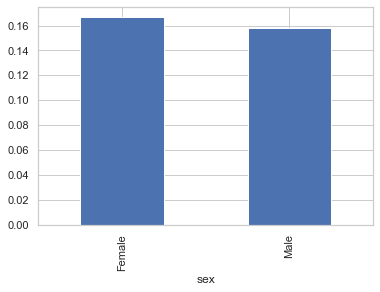

Female give more average Percentage tip than Male


In [55]:
df.groupby('sex')['pct_tip'].mean().plot(kind = 'bar')
plt.show()
print('Female give more average Percentage tip than Male')

### 14. Does pct_tip differ by size (number of people at the table)? 

size
1    0.217292
2    0.165719
3    0.152157
4    0.145949
5    0.141495
6    0.156229
Name: pct_tip, dtype: float64


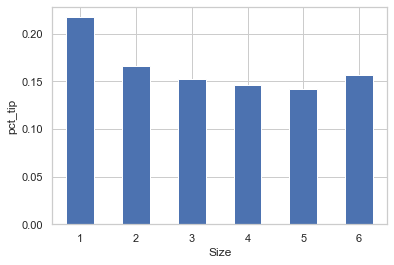

Table with size 1 give average max pct_tip


In [56]:
pct_tip_size = df.groupby('size')['pct_tip'].mean()
print(pct_tip_size)
pct_tip_size.plot(kind = 'bar',rot =0)
plt.xlabel('Size')
plt.ylabel('pct_tip')
plt.show()
print('Table with size 1 give average max pct_tip')

### 15. Make the gender vs. smoker view using pct_tip  - does your inference change?

sex     smoker
Female  No        15.692097
        Yes       18.215035
Male    No        16.066872
        Yes       15.277118
Name: pct_tip, dtype: float64


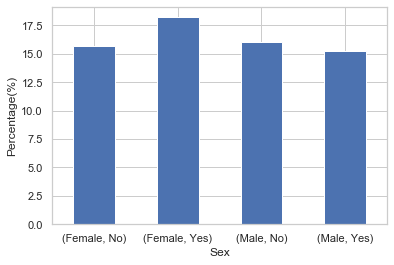

Group with female smoker give more pct_tip


In [57]:
sex_smoker = df.groupby(['sex','smoker'])['pct_tip'].mean().mul(100)
print(sex_smoker)
sex_smoker.plot(kind='bar',rot=0)
plt.xlabel('Sex')
plt.ylabel('Percentage(%)')
plt.show()
print('Group with female smoker give more pct_tip')


### 16. Make a scatter plot of total_bill vs. tip.

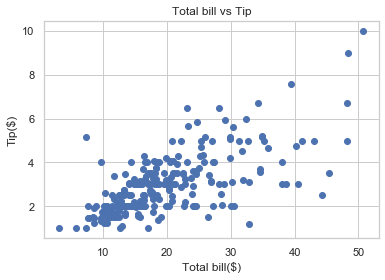

In [58]:
plt.scatter(df['total_bill'],df['tip'])
plt.xlabel('Total bill($)')
plt.ylabel('Tip($)')
plt.title('Total bill vs Tip')
plt.show()

### 17. Make a scatter plot of total_bill vs. pct_tip.

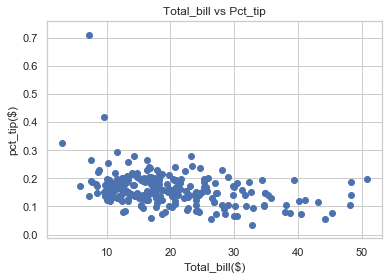

In [59]:
plt.scatter(df['total_bill'],df['pct_tip'])
plt.xlabel('Total_bill($)')
plt.ylabel('pct_tip($)')
plt.title('Total_bill vs Pct_tip')
plt.show()